   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

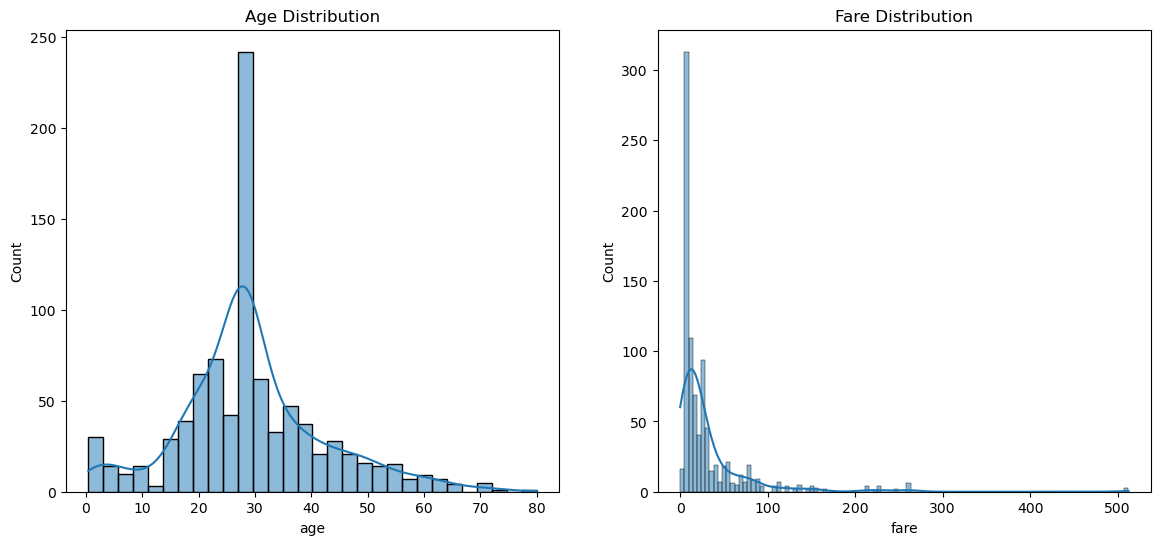

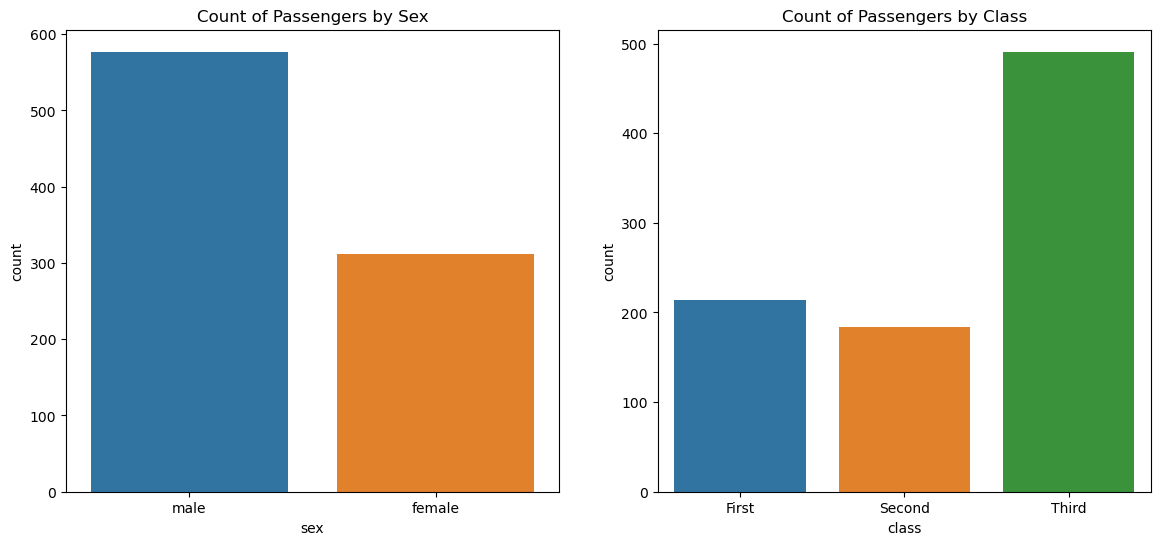

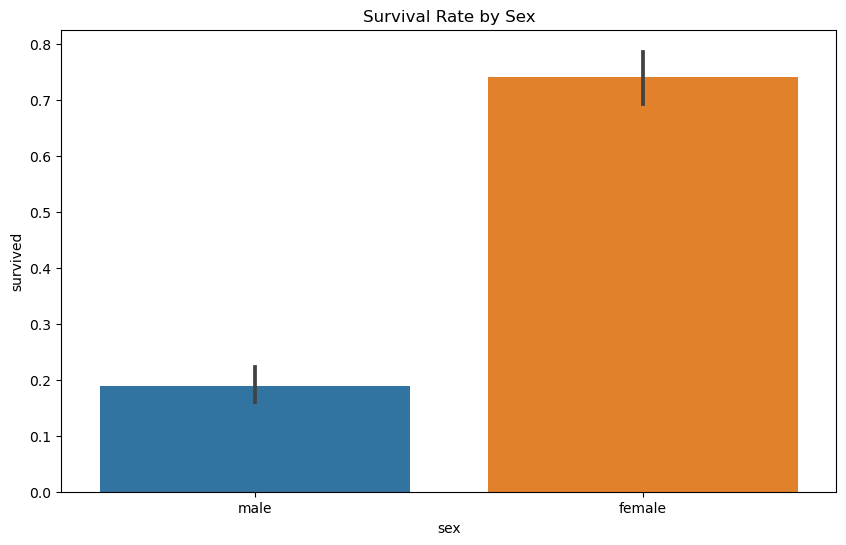

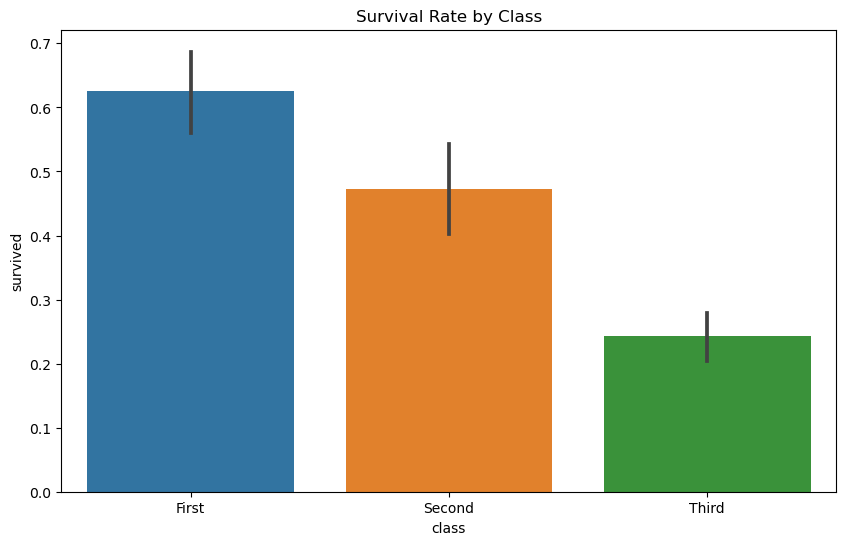

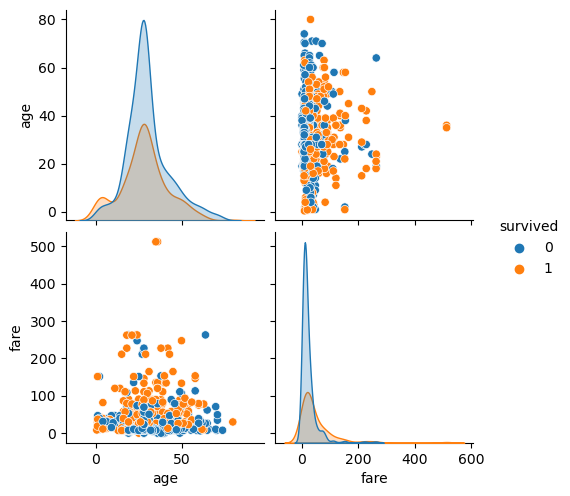

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Handling missing values
# Fill missing age values with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embarked values with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'deck' column due to high number of missing values
df.drop(columns=['deck'], inplace=True)

# Drop rows with missing 'embark_town' and 'fare' values
df.dropna(subset=['embark_town', 'fare'], inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Plotting the distribution of numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')

plt.show()

# Plotting the count of categorical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sex')
plt.title('Count of Passengers by Sex')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='class')
plt.title('Count of Passengers by Class')

plt.show()

# Exploring the relationship between variables
# Survival rate by sex
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='class', y='survived')
plt.title('Survival Rate by Class')
plt.show()

# Pairplot to see pairwise relationships
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived', diag_kind='kde')
plt.show()
